In [180]:
#https://medium.com/analytics-vidhya/build-your-own-technical-analysis-stock-screener-using-python-5d1bb3d091f0
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
filepath = 'C:/Users/Wai/OneDrive/Desktop/Stocks-Demo/'
pd.set_option("display.precision",4)
#df = pd.read_csv("stocks_rets.csv")
df = pd.read_csv(filepath + 'klse_stocks_v4.csv')#.set_index('Date')
df2 = pd.read_csv(filepath + 'klse.csv')
df3 = pd.read_csv(filepath + 'klse_stocks_ret_v4.csv')
%matplotlib inline

In [181]:
df.tail(5)

Date      ^KLSE  0002.KL  0021.KL  0041.KL  0097.KL  0128.KL  \
253  2022-09-09  1496.5300     4.20    0.960     0.44     7.30     2.72   
254  2022-09-12  1497.9600     4.20    0.970     0.45     7.45     2.86   
255  2022-09-13  1487.8400     4.26    0.975     0.43     7.55     2.87   
256  2022-09-14  1468.4399     4.42    0.975     0.42     7.34     2.85   
257  2022-09-15  1467.3101     4.68    0.920     0.42     7.60     2.73   

     0166.KL  1015.KL  1023.KL  ...  8664.KL  8702.KL  8869.KL  9059.KL  \
253     2.75     4.06     5.44  ...    0.720     3.43   4.9822     1.03   
254     2.80     4.08     5.47  ...    0.705     3.43   4.8925     1.02   
255     2.81     4.11     5.45  ...    0.700     3.47   4.7900     1.01   
256     2.77     4.05     5.39  ...    0.680     3.36   4.6200     1.03   
257     2.80     4.10     5.37  ...    0.700     3.42   4.7200     1.01   

     9075.KL  9172.KL  9288.KL  9334.KL  9687.KL  9822.KL  
253    0.815     3.11     2.26     7.20     1.75     4.82  
254    0.855     3.11     2.16     7.10     1.78     4.97  
255    0.890     3.10     2.09     7.14     1.75     4.98  
256    0.855     3.10     2.06     6.98     1.75     4.99  
257    0.825     3.07     1.97     6.95     1.75     5.17  

[5 rows x 145 columns]

In [182]:
df1 = df[['Date','7222.KL','3158.KL', '2089.KL', '5209.KL']]
df1.tail()

Date  7222.KL  3158.KL  2089.KL  5209.KL
253  2022-09-09     4.50     3.92    15.16     3.50
254  2022-09-12     4.95     3.97    15.30     3.53
255  2022-09-13     4.92     3.95    15.00     3.50
256  2022-09-14     4.99     4.05    14.88     3.49
257  2022-09-15     4.99     3.98    14.58     3.53

In [183]:
df1 = df1.set_index('Date')
df1.head()

7222.KL  3158.KL  2089.KL  5209.KL
Date                                          
2021-09-01   1.9719     2.71  13.1499   2.5452
2021-09-02   1.9719     2.68  13.1499   2.5264
2021-09-03   1.8930     2.66  13.1499   2.5358
2021-09-06   1.9719     2.67  13.2272   2.5546
2021-09-07   1.9719     2.66  13.1692   2.5546

In [184]:
stocks = []
for i in df1.columns:
    #x = df1.columns[i]
    for j in range(df2.shape[0]):
        if i == df2.code1.iloc[j]:
            print(df2.name.iloc[j])
            stocks.append(df2.name.iloc[j])
            break

IMASPRO CORPORATION BERHAD
YNH PROPERTY BERHAD
UNITED PLANTATIONS BERHAD
GAS MALAYSIA BERHAD


In [185]:
#stocks_list = ['HWM', 'AKAM', 'ABT', 'SPDN']
#w = [0.1728, 0.2621,0.3253,0.2396]
w = [0.25, 0.25,0.25,0.25]
sum(w)

1.0

In [186]:
k = 0
windows = 10#20
window_size = df1.shape[0]
windows_forward = window_size - windows

import numpy as np
p = []
for j in range(windows_forward):
    
    prices1 = df1.iloc[k:windows,].mean()
    port_price = np.dot(w,prices1)
    #print('Mean Price: ', port_price)
    #print(prices1)
    k = k+1
    windows = windows + 1
    p.append(port_price)
    

In [187]:
window_size = df1.shape[0]

pp = pd.DataFrame()
pp = pd.DataFrame()
win = [10,20,30,40]
for i in win:
    p = []
    k = 0
    windows = i
    windows_forward = window_size - i
    
    for j in range(windows_forward):
    
        prices1 = df1.iloc[k:windows,].mean()
        port_price = np.dot(w,prices1)
    #print('Mean Price: ', port_price)
    #print(prices1)
        k = k+1
        windows = windows + 1
        p.append(port_price)
    p1 = pd.DataFrame(p)
    pp = pd.concat([pp,p1],axis =1)

<AxesSubplot:>

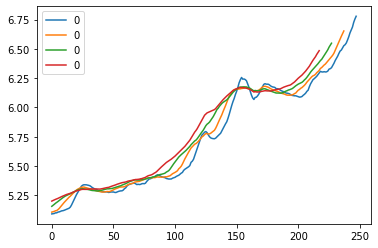

In [188]:
pp.plot()

In [189]:
# print(pp.iloc[:,0].mean()/pp.iloc[:,0].std())
# print(pp.iloc[:,1].mean()/pp.iloc[:,1].std())
# print(pp.iloc[:,2].mean()/pp.iloc[:,2].std())
# print(pp.iloc[:,3].mean()/pp.iloc[:,3].std())
# print(pp.iloc[:,4].mean()/pp.iloc[:,4].std())

In [190]:
# import matplotlib.pyplot as plt
# %matplotlib inline
# # plt.xlim(0,140)
# # plt.ylim(80,115)
# # pp.plot(figsize=(15,15),subplots=True,grid=True)

# pp.plot(figsize=(15,15),subplots=True,xlim=(0,360),ylim=(4,7),grid=True)


<AxesSubplot:>

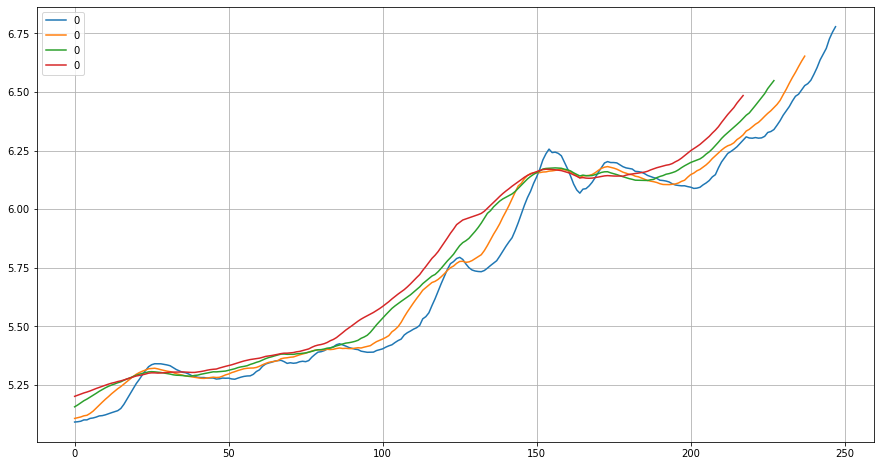

In [191]:
prices = pd.DataFrame(pp)
prices.plot(figsize=(15,8),grid=True)

['IMASPRO CORPORATION BERHAD', 'YNH PROPERTY BERHAD', 'UNITED PLANTATIONS BERHAD', 'GAS MALAYSIA BERHAD']


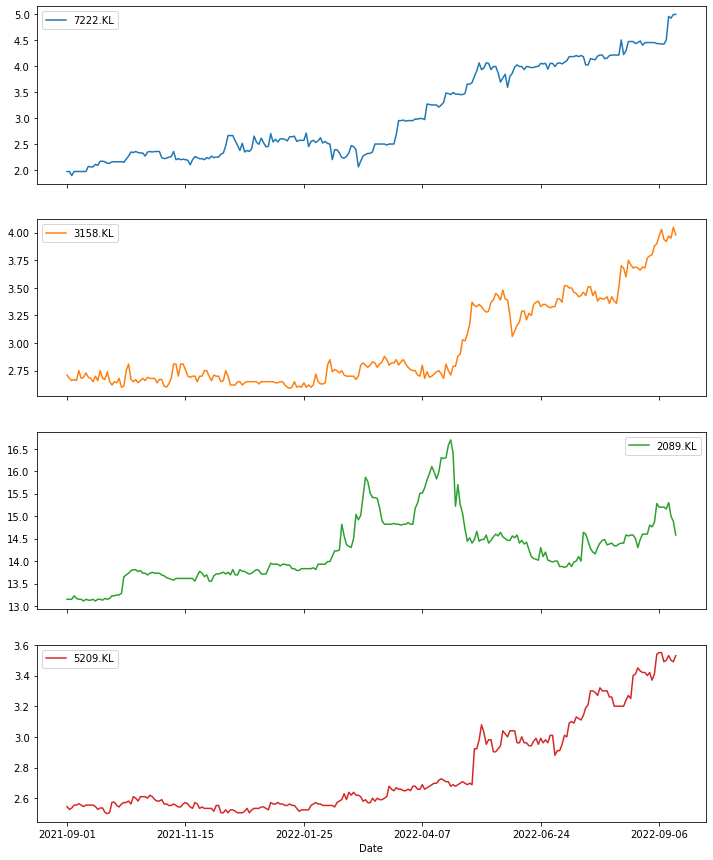

In [192]:
df1.plot(figsize=(12,15),subplots=True)
print(stocks)

In [193]:
l = df1.shape[1]
l

4

In [194]:
for i in df1.columns:
    df1['{}_avg'.format(i)] = df1[i].rolling(window=24).mean()

In [195]:
df1.head()

7222.KL  3158.KL  2089.KL  5209.KL  7222.KL_avg  3158.KL_avg  \
Date                                                                       
2021-09-01   1.9719     2.71  13.1499   2.5452          NaN          NaN   
2021-09-02   1.9719     2.68  13.1499   2.5264          NaN          NaN   
2021-09-03   1.8930     2.66  13.1499   2.5358          NaN          NaN   
2021-09-06   1.9719     2.67  13.2272   2.5546          NaN          NaN   
2021-09-07   1.9719     2.66  13.1692   2.5546          NaN          NaN   

            2089.KL_avg  5209.KL_avg  
Date                                  
2021-09-01          NaN          NaN  
2021-09-02          NaN          NaN  
2021-09-03          NaN          NaN  
2021-09-06          NaN          NaN  
2021-09-07          NaN          NaN

In [196]:
df1 = df1.dropna()

In [197]:
df1['raw'] = df1.iloc[:,:l].apply(lambda x: np.sum(x * w),axis=1)

<ipython-input-197-b2f1ee006aea>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['raw'] = df1.iloc[:,:l].apply(lambda x: np.sum(x * w),axis=1)


In [198]:
# a = df['^KLSE'].values
# b = df1.raw.values
# np.corrcoef(a,b)[0, 1]

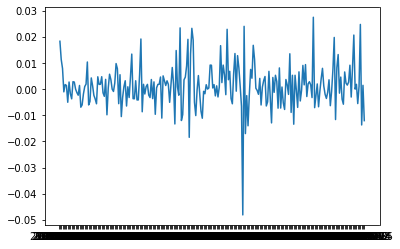

In [199]:
#plt.plot(df['^KLSE'])
plt.plot(df1.raw.pct_change())

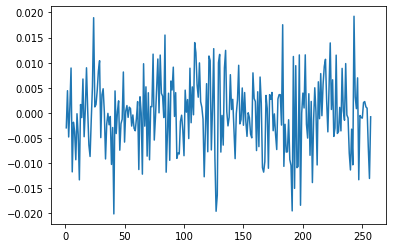

In [200]:
plt.plot(df['^KLSE'].pct_change())

In [201]:
rows = df1.shape[0]
np.corrcoef(df['^KLSE'].iloc[-rows:].values,df1.raw.iloc[-rows:].values)[0, 1]

-0.31819904391370885

In [202]:
corre = []
for i in range(rows-5):
    j = i+5
    cor = np.corrcoef(df['^KLSE'].iloc[-j:].values,df1.raw.iloc[-j:].values)[0, 1]
    cor = abs(cor)
    corre.append(cor)

In [203]:
sum(corre)

77.33889474847884

In [204]:
import statistics
prob = statistics.mean(corre)

In [206]:
df['^KLSE'].pct_change().std() , df1.raw.pct_change().std()

(0.007214190532289319, 0.008420356994504517)

In [174]:
klse_std = df['^KLSE'].pct_change().std()
stock_std = df1.raw.pct_change().std()
H = statistics.mean(corre) * (stock_std/klse_std)
H

0.3155843590878659

In [175]:
(H*1000000)/80000

3.944804488598324

In [176]:
4200/80000

0.0525

In [177]:
(H*30000)/80000

0.11834413465794971

In [178]:
((df['^KLSE'].shift() - df['^KLSE']) *50).std()

551.8498740487487

### HEDGE 

In [179]:
(((df['^KLSE'].shift() - df['^KLSE']) *50).std()) /((df1.raw.pct_change() * 65500).std())

1.0052319123019826

Slope:  0.0009600566761322132


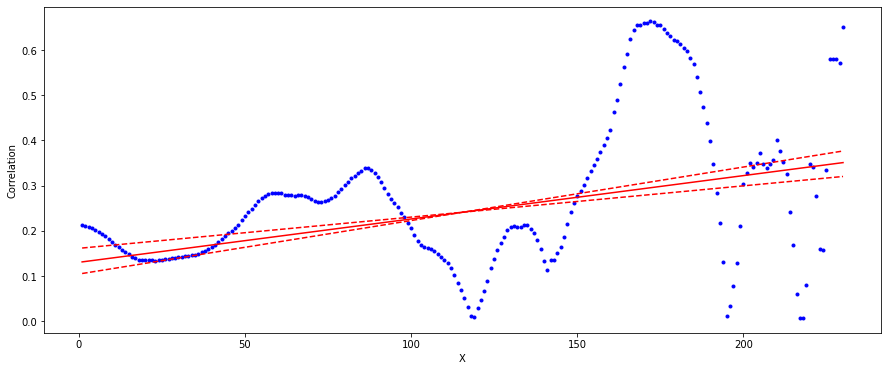

In [83]:
from scipy import stats

def norm0_1(x):
    return (x - x.min())/ (x.max()-x.min())

def denorm(x_norm, x):
    return (x_norm * (x.max() - x.min()) + x.min())


cor2 = stats.theilslopes(list(reversed(corre)), X, 0.90)[0]
print('Slope: ',cor2)
l = list(reversed(corre))
#x = pd.DataFrame(np.arange(1,len(corre)+1))
X = np.arange(1,rows-4,1)
df4 = pd.DataFrame({'X':np.arange(1,len(corre)+1),'cor':l})
x = df4['X'].astype(float)
x_norm = 2*norm0_1(x)-1
y = df4.cor
res = stats.theilslopes(y, x_norm, 0.90)


fig = plt.figure(figsize=(15,6))

ax = fig.add_subplot(111)

ax.plot(x, y, 'b.')
ax.plot(x, res[1] + res[0] * x_norm, 'r-')
ax.plot(x, res[1] + res[2] * x_norm, 'r--')
ax.plot(x, res[1] + res[3] * x_norm, 'r--')
plt.ylabel('Correlation')
plt.xlabel('X')

plt.show()

In [194]:
ll = l+l
ll

8

In [195]:
df1['avg'] = df1.iloc[:,l:ll].apply(lambda x: np.sum(x * w),axis=1)
df1.head()

<ipython-input-195-6c514d1b77ed>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['avg'] = df1.iloc[:,l:ll].apply(lambda x: np.sum(x * w),axis=1)


7222.KL  3158.KL  2089.KL  5209.KL  7222.KL_avg  3158.KL_avg  \
Date                                                                       
2021-10-05   2.1592     2.60  13.2852   2.5619       2.0672       2.6788   
2021-10-06   2.1494     2.61  13.6527   2.5714       2.0746       2.6746   
2021-10-07   2.2085     2.75  13.6913   2.5714       2.0844       2.6775   
2021-10-08   2.2677     2.81  13.7300   2.5810       2.1001       2.6838   
2021-10-11   2.3465     2.67  13.7880   2.5619       2.1157       2.6838   

            2089.KL_avg  5209.KL_avg     raw     avg  
Date                                                  
2021-10-05      13.1700       2.5441  5.9901  5.9531  
2021-10-06      13.1910       2.5452  6.1128  5.9603  
2021-10-07      13.2135       2.5471  6.1723  5.9706  
2021-10-08      13.2377       2.5490  6.2131  5.9833  
2021-10-11      13.2611       2.5493  6.2044  5.9936

In [196]:
df1['raw_chg'] = df1['raw'].pct_change(1)
df1['avg_chg'] = df1['avg'].pct_change(1)

<ipython-input-196-5d67fbba4414>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['raw_chg'] = df1['raw'].pct_change(1)
<ipython-input-196-5d67fbba4414>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['avg_chg'] = df1['avg'].pct_change(1)


<AxesSubplot:xlabel='Date'>

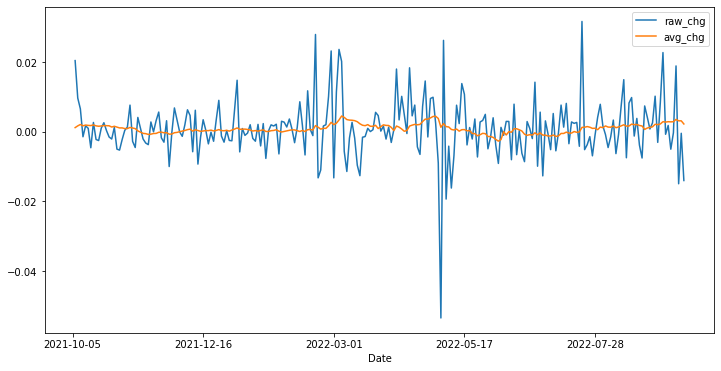

In [197]:
df1[['raw_chg','avg_chg']].plot(figsize=(12,6))

<ipython-input-198-711b6147e826>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['raw_cum'] = df1['raw_chg'].cumsum()
<ipython-input-198-711b6147e826>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['avg_cum'] = df1['avg_chg'].cumsum()


<AxesSubplot:xlabel='Date'>

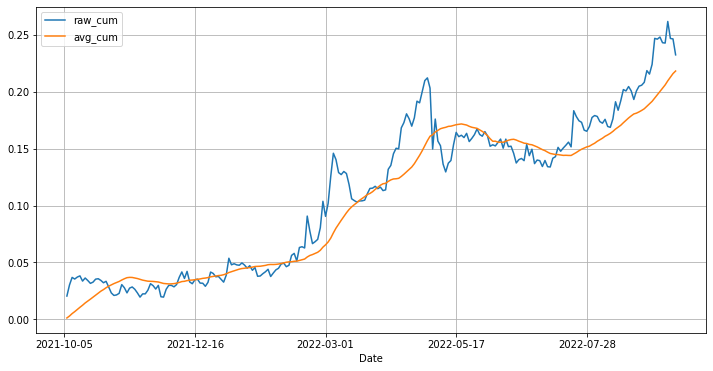

In [198]:
df1['raw_cum'] = df1['raw_chg'].cumsum()
df1['avg_cum'] = df1['avg_chg'].cumsum()
df1[['raw_cum','avg_cum']].plot(figsize=(12,6),grid=True)

<AxesSubplot:xlabel='Date'>

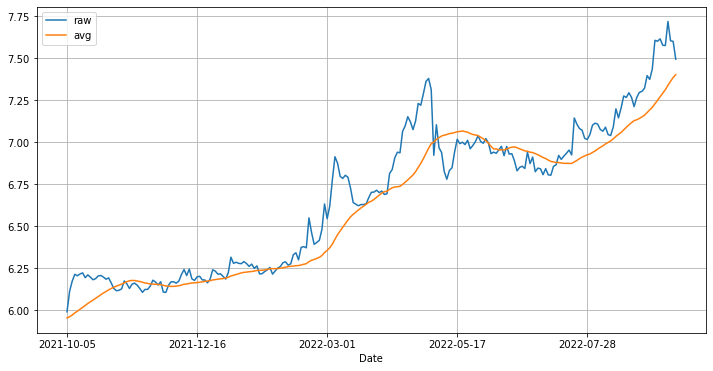

In [199]:
df1[['raw','avg']].plot(figsize=(12,6),grid=True)

<AxesSubplot:>

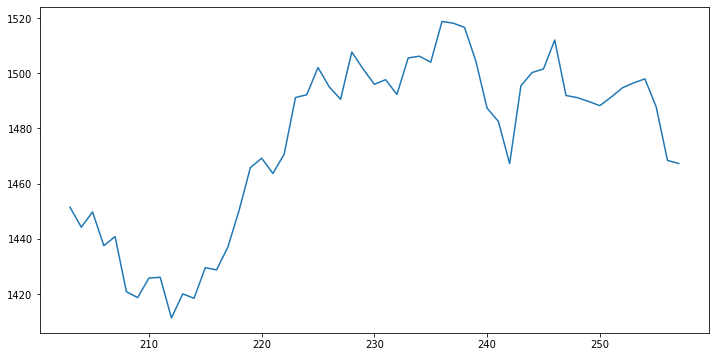

In [200]:
df['^KLSE'].loc['2021-10-05':].plot(figsize=(12,6))

<ipython-input-201-f4c4fc7ba4e6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Buy'] = df1.raw-df1.avg


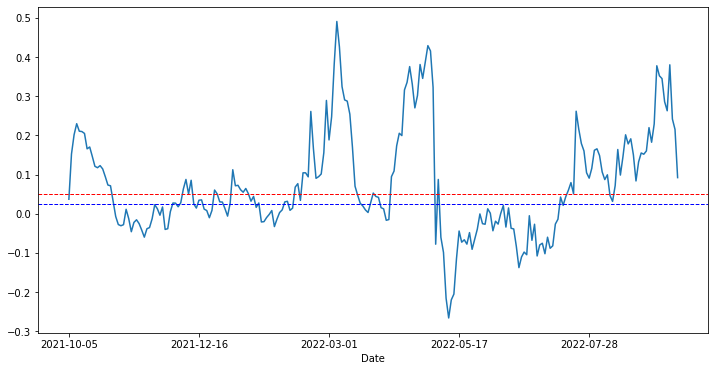

In [201]:
df1['Buy'] = df1.raw-df1.avg 
ax = df1['Buy'].plot(figsize=(12,6))
ax.axhline(y=0.05,color='r', linestyle='--', lw=1)
ax.axhline(y=0.025,color='b', linestyle='--', lw=1)

In [202]:
df1[['raw','avg','Buy']].tail(20)

raw     avg     Buy
Date                              
2022-08-18  7.2664  7.0882  0.1782
2022-08-19  7.2945  7.1032  0.1913
2022-08-22  7.2665  7.1162  0.1503
2022-08-23  7.2119  7.1282  0.0837
2022-08-24  7.2656  7.1333  0.1323
2022-08-25  7.2963  7.1412  0.1551
2022-08-26  7.3023  7.1504  0.1519
2022-08-29  7.3211  7.1608  0.1603
2022-08-30  7.3962  7.1764  0.2198
2022-09-01  7.3738  7.1913  0.1825
2022-09-02  7.4369  7.2076  0.2293
2022-09-05  7.6065  7.2287  0.3778
2022-09-06  7.6012  7.2490  0.3522
2022-09-07  7.6152  7.2701  0.3450
2022-09-08  7.5772  7.2910  0.2862
2022-09-09  7.5752  7.3123  0.2629
2022-09-12  7.7188  7.3385  0.3803
2022-09-13  7.6036  7.3618  0.2418
2022-09-14  7.6004  7.3852  0.2153
2022-09-15  7.4941  7.4019  0.0922

In [203]:
df1['Buy'].loc[df1.Buy>0].describe()

count    166.0000
mean       0.1298
std        0.1156
min        0.0006
25%        0.0320
50%        0.0943
75%        0.1975
max        0.4910
Name: Buy, dtype: float64

In [204]:
df1['Buy'].loc[df1.Buy<0].describe()

count    69.0000
mean     -0.0568
std       0.0540
min      -0.2662
25%      -0.0779
50%      -0.0389
75%      -0.0211
max      -0.0006
Name: Buy, dtype: float64

In [205]:
profit = (df1['raw'].iloc[-1]-df1['raw'].iloc[0])/df1['raw'].iloc[0]
print('% profit: ',profit*100)

% profit:  25.108286188595464


In [206]:
((profit*100)/df1.shape[0])*252

26.92463029585556

In [207]:
# profit = (df1['raw'].iloc[252]-df1['raw'].iloc[0])/df1['raw'].iloc[0]
# print('% profit: ',profit*100)

In [208]:
cap = 20000
w1 = [val * cap for val in w]
w1

[3456.0, 5242.0, 6506.0, 4792.0]

In [209]:
df1.iloc[-1,:l]

7222.KL     4.99
3158.KL     3.98
2089.KL    14.58
5209.KL     3.53
Name: 2022-09-15, dtype: float64

In [210]:
w1/df1.iloc[-1,:l]

7222.KL     692.5852
3158.KL    1317.0854
2089.KL     446.2277
5209.KL    1357.5071
Name: 2022-09-15, dtype: float64

### Max Draw Down

In [211]:
Roll_Max = df1['raw'].cummax()
Daily_Drawdown =  df1['raw']/Roll_Max - 1.0
Max_Daily_Drawdown = Daily_Drawdown.cummin()
print('Raw Max DD: ',Max_Daily_Drawdown)

Raw Max DD:  Date
2021-10-05    0.0000
2021-10-06    0.0000
2021-10-07    0.0000
2021-10-08    0.0000
2021-10-11   -0.0014
               ...  
2022-09-09   -0.0813
2022-09-12   -0.0813
2022-09-13   -0.0813
2022-09-14   -0.0813
2022-09-15   -0.0813
Name: raw, Length: 235, dtype: float64


In [212]:
Roll_Max = df1['avg'].cummax()
Daily_Drawdown =  df1['avg']/Roll_Max - 1.0
Max_Daily_Drawdown = Daily_Drawdown.cummin()
print('Avg Max DD: ',Max_Daily_Drawdown)

Avg Max DD:  Date
2021-10-05    0.0000
2021-10-06    0.0000
2021-10-07    0.0000
2021-10-08    0.0000
2021-10-11    0.0000
               ...  
2022-09-09   -0.0273
2022-09-12   -0.0273
2022-09-13   -0.0273
2022-09-14   -0.0273
2022-09-15   -0.0273
Name: avg, Length: 235, dtype: float64


In [213]:
df1['Cumulative'] = df1.raw_chg.cumsum().round(2)
df1['HighValue'] = df1['Cumulative'].cummax()
df1['raw_dd'] = df1['Cumulative'] - df1['HighValue']

df1['Cumulative'] = df1.avg_chg.cumsum().round(2)
df1['HighValue'] = df1['Cumulative'].cummax()
df1['avg_dd'] = df1['Cumulative'] - df1['HighValue']

<ipython-input-213-606ea0ce65b2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Cumulative'] = df1.raw_chg.cumsum().round(2)
<ipython-input-213-606ea0ce65b2>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['HighValue'] = df1['Cumulative'].cummax()
<ipython-input-213-606ea0ce65b2>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pan

<AxesSubplot:xlabel='Date'>

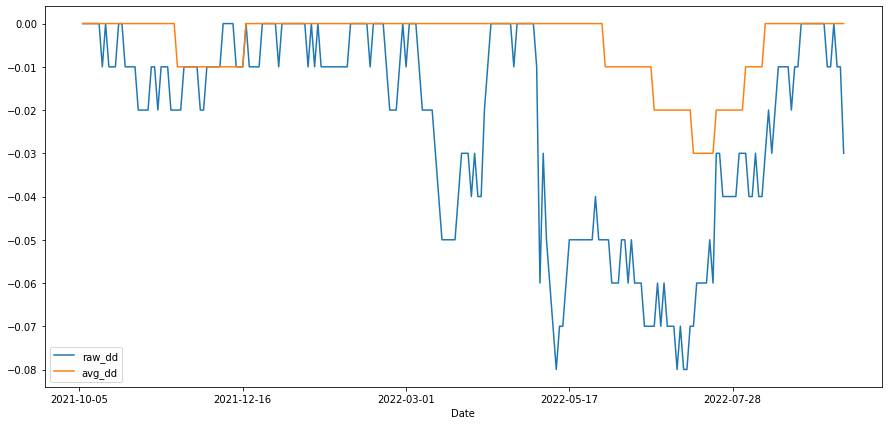

In [214]:
df1[['raw_dd','avg_dd']].plot(figsize=(15,7))

In [137]:
df1['shifted_price'] = df1.raw.shift()

In [138]:
cond = [df1.raw - df1.avg > 0.119, df1.raw - df1.avg < -0.103]
choices = ['Buy','Sell']
df1['Signal'] = np.select(cond,choices)

In [139]:
df1['Signal'].value_counts()

Sell    235
Name: Signal, dtype: int64

In [140]:
df1.Signal = df1.Signal.shift() # shift 1 day forward so buy today after getting signal yesterday

In [141]:
#https://klse.i3investor.com/web/hti/brokers
fees = 0.004
position = False
buydates,selldates = [],[]
buyprices,sellprices = [],[]
for index,row in df1.iterrows():
    if not position and row['Signal'] == 'Buy':
        buydates.append(index)
        buyprice1 = row.raw + (row.raw*fees)
        #buyprice1 = row.shifted_price + (row.shifted_price*fees)
        print('Buy ',buyprice1)
         #print(buyprices)
        #buyprices.append(row.raw)
        buyprices.append(buyprice1)
        position = True
        
    if position:
        if row['Signal'] == 'Sell' or row.shifted_price < 0.5 * buyprices[-1]:
            selldates.append(index)
            sellprice1 = row.raw - (row.raw*fees)
            #sellprice1 = row.shifted_price - (row.shifted_price*fees)
            print('Sell ',sellprice1)
            sellprices.append(sellprice1)
            position = False
        

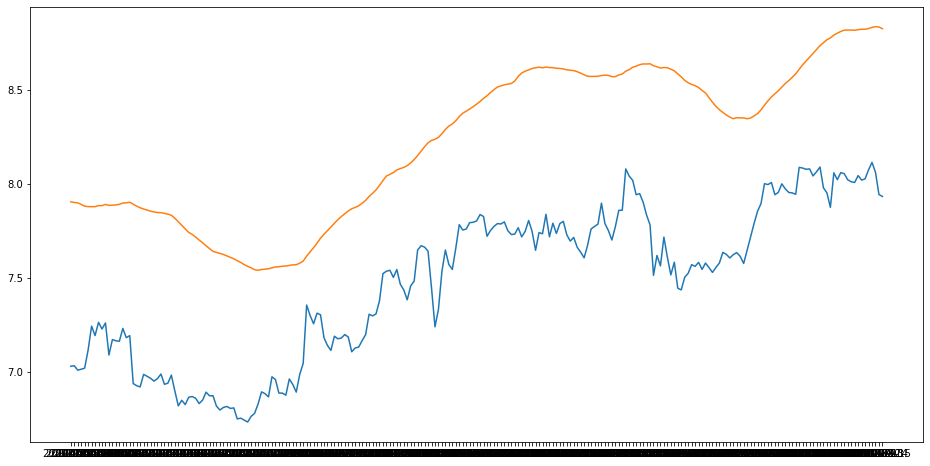

In [142]:
plt.figure(figsize=(16,8))
plt.plot(df1.raw)
plt.plot(df1.avg)

plt.scatter(df1.loc[buydates].index,df1.loc[buydates].raw,marker='^',color='g')
plt.scatter(df1.loc[selldates].index,df1.loc[selldates].raw,marker='>',color='r')

In [143]:
pd.DataFrame(sellprices,buyprices)

Empty DataFrame
Columns: []
Index: []

In [144]:
buyprices

[]

In [145]:
(pd.Series([(sell-buy)/buy for sell,buy in zip(sellprices,buyprices)]) + 1).prod()

<ipython-input-145-4ed39ea291e2>:1: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  (pd.Series([(sell-buy)/buy for sell,buy in zip(sellprices,buyprices)]) + 1).prod()


1.0